In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import drivers
from importlib import  reload
from lib import data_management as dm

In [4]:
# reload(drivers.Agilent_EXA)
from drivers.Agilent_EXA import *
# reload(drivers.KeysightAWG)
from drivers.KeysightAWG import *
from drivers.Keysight_DSOX2014 import *
from drivers.E8257D import MXG, EXG
from drivers.Yokogawa_GS200 import Yokogawa_GS210
from scipy.fftpack import fft, fftshift

In [3]:
from drivers.Agilent_PNA_L import *

In [4]:
vna = Agilent_PNA_L("PNA-L2")

In [5]:
dso = Keysight_DSOX2014("DSO2014")

In [6]:
ro_awg = KeysightAWG("AWG2")
ro_lo = MXG("MXG")
current = Yokogawa_GS210("GS210_1")
q_lo = EXG("EXG")

In [7]:
q_awg=KeysightAWG("AWG3")

## Capture the noise

In [9]:
if_freq = 50e6

In [11]:
nop = 500
points = range(nop)

In [16]:
Is, Qs = [], []
dso.set_averages(2000)
for idx, point in enumerate(points):
    print("\r%.2f%%"%((idx+1)/len(points)*100), end="")
    dso.digitize()
    times, channel_data = dso.get_data(Channel.ONE, Channel.TWO)
    Is.append(sum(channel_data[0]*cos(2*pi*if_freq*times) + channel_data[1]*sin(2*pi*if_freq*times)))
    Qs.append(sum(channel_data[1]*cos(2*pi*if_freq*times) - channel_data[0]*sin(2*pi*if_freq*times)))
Is, Qs = array(Is), array(Qs)
amps = 20*log10(sqrt(Is**2+Qs**2))
phas = arctan(Is/Qs)

100.00%

#### No filters:

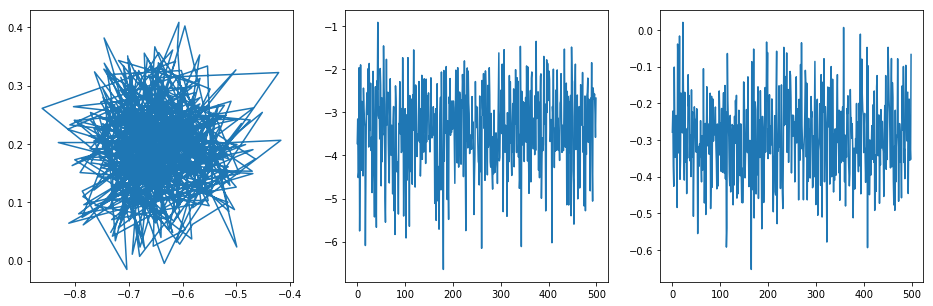

In [55]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [56]:
std(Is+1j*Qs)

0.10750385291939576

#### DC-50 MHz filters after IF amplifiers:

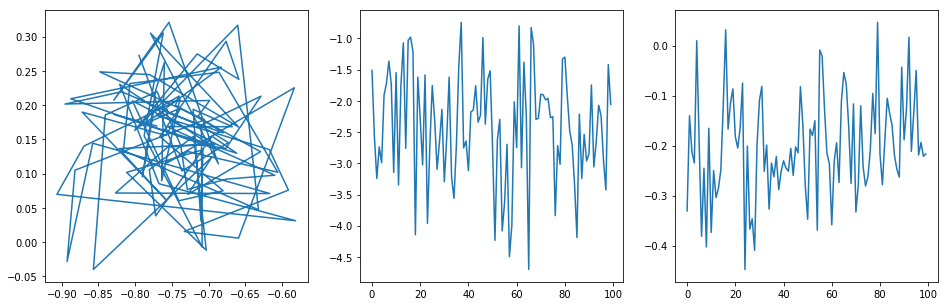

In [15]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [16]:
std(Is+1j*Qs)

0.10753294031884759

#### DC-50 MHz filters after IF amplifiers + bandpass 5600-7000 MHz @ RF of the downconvertor

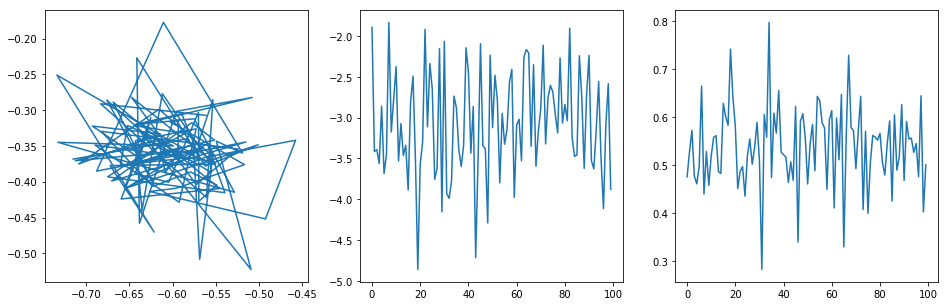

In [18]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [19]:
std(Is+1j*Qs)

0.077540945465851538

#### DC-50 MHz filters after AWG and after IF amplifiers + bandpass 5600-7000 MHz @ RF of the downconvertor

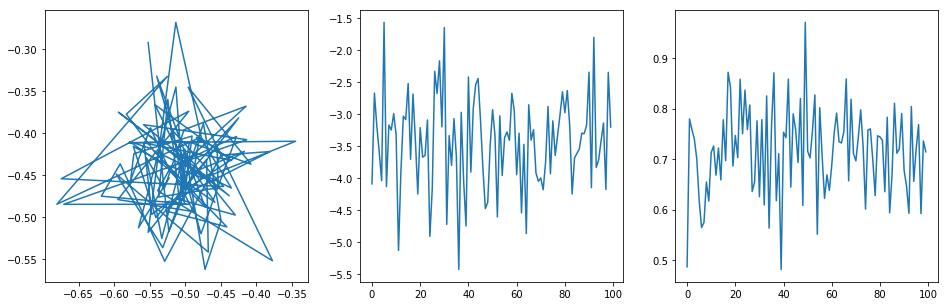

In [24]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [25]:
std(Is+1j*Qs)

0.080929765616696528

####  Bandpass 5600-7000 MHz @ RF of the downconverter only

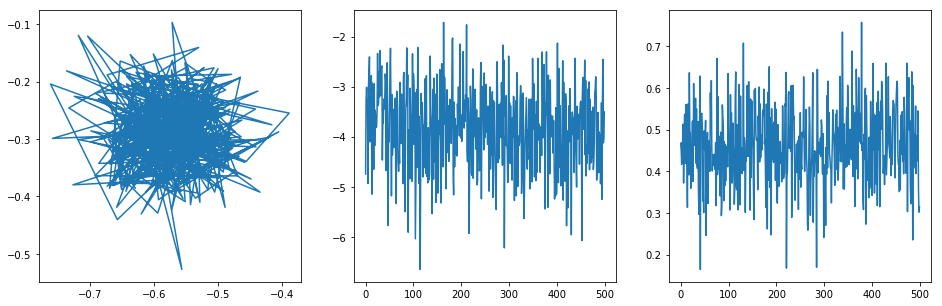

In [58]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [59]:
std(Is+1j*Qs)

0.086116590909129945

####  Bandpass 5600-7000 MHz before RT amplifier only

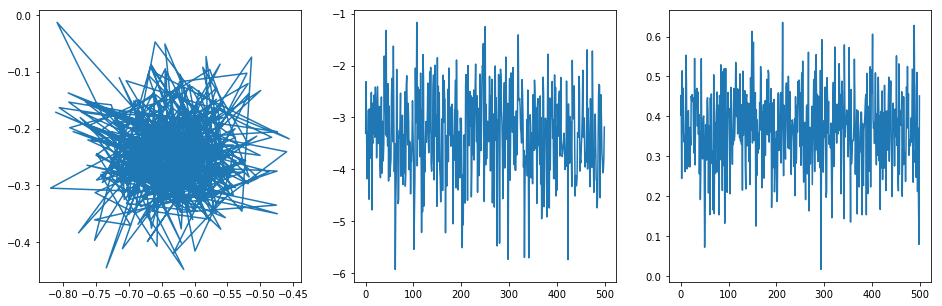

In [52]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [53]:
std(Is+1j*Qs)

0.093090796251738411

####  Bandpass 5600-7000 MHz before RT amplifier and after RT amp @ RF of downconverter

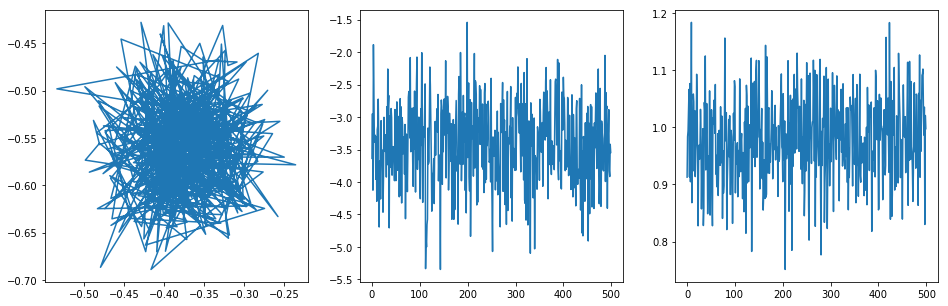

In [61]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [62]:
std(Is+1j*Qs)

0.069897486605225267

####  Bandpass 5600-7000 MHz @ RF of the downconvertor + DC-50MHz filters before IF amplifiers

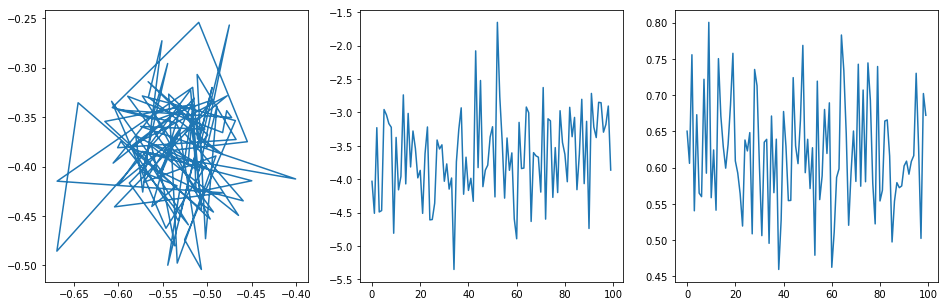

In [36]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [43]:
std(Is+1j*Qs)

0.06845418742724374

####  Bandpass 5600-7000 MHz before RT amplifier and after RT amp @ RF of downconverter + DC-50MHz filters before IF amplifiers

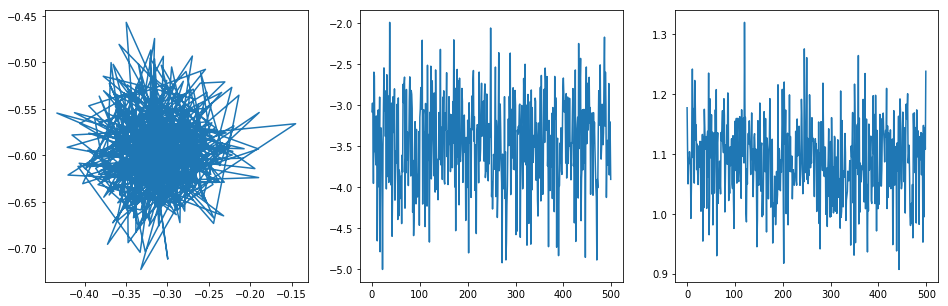

In [65]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [66]:
std(Is+1j*Qs)

0.060695460498637534

### Testing amplifiers 

#### Single RT amplifier

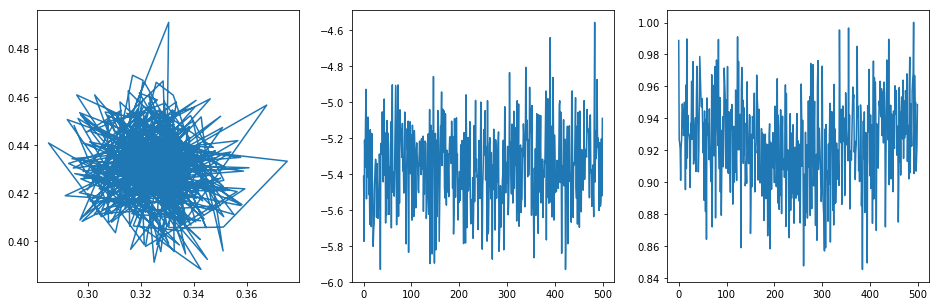

In [13]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [15]:
std(Is+1j*Qs)/mean(sqrt(Is**2+Qs**2))

0.038129222282618183

#### Two RT amplifiers

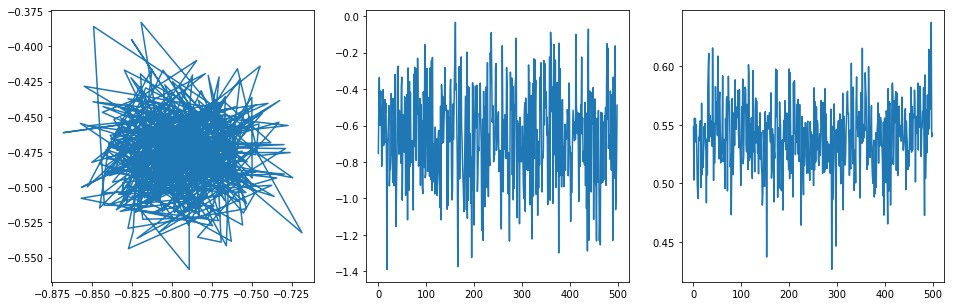

In [17]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(Qs, Is)
axes[1].plot(points, amps)
axes[2].plot(points, phas)

In [18]:
std(Is+1j*Qs)/mean(sqrt(Is**2+Qs**2))

0.041701087147762134

# VNA noise 

#### 2 Hz bw, 1 point

In [ ]:
vna.set_bandwidth(2)
vna.set_nop(1)

In [6]:
z_data = []
for i in range(0, 100):
    vna.prepare_for_stb()
    vna.sweep_single()
    vna.wait_for_stb()
    z_data.append(vna.get_sdata())
z_data = array(z_data)

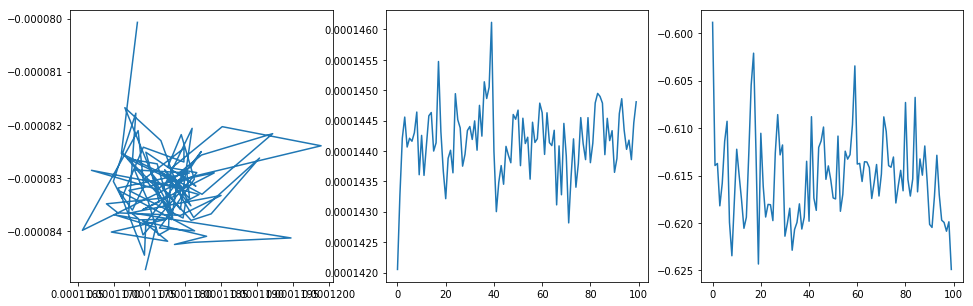

In [8]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(real(z_data),imag(z_data))
axes[1].plot(range(100), abs(z_data))
axes[2].plot(range(100), angle(z_data))

In [9]:
std(z_data)/mean(abs(z_data))

0.0060393496583571529

#### 2 Hz bw, 1 point

In [11]:
vna.set_bandwidth(200)
vna.set_nop(100)

True

In [12]:
z_data = []
for i in range(0, 100):
    vna.prepare_for_stb()
    vna.sweep_single()
    vna.wait_for_stb()
    z_data.append(mean(vna.get_sdata()))
z_data = array(z_data)

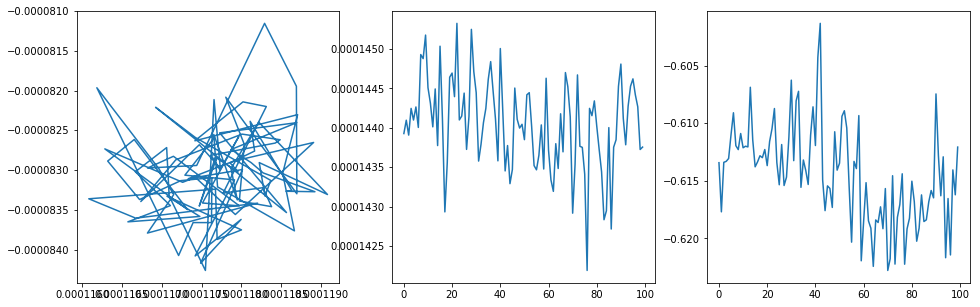

In [13]:
fig, axes = plt.subplots(1,3, figsize = (16,5))
axes[0].plot(real(z_data),imag(z_data))
axes[1].plot(range(100), abs(z_data))
axes[2].plot(range(100), angle(z_data))

In [14]:
std(z_data)/mean(abs(z_data))

0.0057401320553749592